In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [0]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
sub = pd.read_csv('sample_submission.csv')

In [0]:
# Data Exploration

In [1980]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [1981]:
train.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

In [1982]:
train['Building Dimension'].nunique()

2043

In [1983]:
train['YearOfObservation'].describe()

count    7160.000000
mean     2013.669553
std         1.383769
min      2012.000000
25%      2012.000000
50%      2013.000000
75%      2015.000000
max      2016.000000
Name: YearOfObservation, dtype: float64

In [1984]:
train['Insured_Period'].value_counts()

1.000000    5325
0.997268     547
0.000000     165
0.747945      60
0.495890      49
            ... 
0.680328       1
0.819672       1
0.792350       1
0.378082       1
0.803279       1
Name: Insured_Period, Length: 401, dtype: int64

In [0]:
to_drop=train[train['Building Dimension'] <30]

In [0]:
train.drop(train.loc[train['Building Dimension']<30].index, inplace=True)

In [0]:
categorical = {'N': 1, 'V':0}
test.replace({"Building_Fenced": categorical},inplace=True)
categorical2 = {'N': 1, 'V':0}
test.replace({"Building_Painted": categorical2},inplace=True)
categorical3 = {'R': 1, 'U':0}
test.replace({"Settlement": categorical3},inplace=True)
categorical4 = {'   .': 10, '4': 9, '5': 8, '3': 7, '6': 6, '7': 5, '8': 4, '9': 3, '2': 2, '>=10':1, '1': 0}
test.replace({"NumberOfWindows": categorical4},inplace=True)

In [0]:
categorical = {'N': 1, 'V':0}
train.replace({"Building_Fenced": categorical},inplace=True)
categorical2 = {'N': 1, 'V':0}
train.replace({"Building_Painted": categorical2},inplace=True)
categorical3 = {'R': 1, 'U':0}
train.replace({"Settlement": categorical3},inplace=True)
categorical4 = {'   .': 10, '4': 9, '5': 8, '3': 7, '6': 6, '7': 5, '8': 4, '9': 3, '2': 2, '>=10':1, '1': 0}
train.replace({"NumberOfWindows": categorical4},inplace=True)

In [1989]:
train['Building_Fenced'].unique()

array([0, 1])

In [0]:
def insured_class(x):
  if x > 0.748 and x <= 1:
    return 'a year'
  elif x > 0.502 and x <=0.748:
    return '3rd quarter'
  elif x > 0.25 and x <= 0.50:
    return 'half_year'
  else:
    return '1st quarter'
train['duration'] =train['Insured_Period'].apply(insured_class)

In [0]:
def insured_classt(x):
  if x > 0.748 and x <= 1:
    return 'a year'
  elif x > 0.502 and x <=0.748:
    return '3rd quarter'
  elif x > 0.25 and x <= 0.50:
    return 'half_year'
  else:
    return '1st quarter'
test['duration'] =test['Insured_Period'].apply(insured_classt)

In [0]:
testid= test['Customer Id']

In [1993]:
print(train.shape), print(test.shape)

(7137, 15)
(3069, 14)


(None, None)

In [1994]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7137 entries, 0 to 7159
Data columns (total 15 columns):
Customer Id           7137 non-null object
YearOfObservation     7137 non-null int64
Insured_Period        7137 non-null float64
Residential           7137 non-null int64
Building_Painted      7137 non-null int64
Building_Fenced       7137 non-null int64
Garden                7130 non-null object
Settlement            7137 non-null int64
Building Dimension    7031 non-null float64
Building_Type         7137 non-null int64
Date_of_Occupancy     6634 non-null float64
NumberOfWindows       7137 non-null int64
Geo_Code              7035 non-null object
Claim                 7137 non-null int64
duration              7137 non-null object
dtypes: float64(3), int64(8), object(4)
memory usage: 892.1+ KB


In [1995]:
train['Settlement'].value_counts()

1    3610
0    3527
Name: Settlement, dtype: int64

In [1996]:
train['Garden'].value_counts(normalize=True)

O    0.505189
V    0.494811
Name: Garden, dtype: float64

In [1997]:
for i in train.columns:
  print (i)

Customer Id
YearOfObservation
Insured_Period
Residential
Building_Painted
Building_Fenced
Garden
Settlement
Building Dimension
Building_Type
Date_of_Occupancy
NumberOfWindows
Geo_Code
Claim
duration


In [1998]:
test['Geo_Code'].nunique()

697

In [0]:
train['Geo_Code']= train['Geo_Code'].map(train['Geo_Code'].value_counts())
test['Geo_Code']= test['Geo_Code'].map(test['Geo_Code'].value_counts())

In [0]:
object_features = train.dtypes[train.dtypes == 'object'].index

In [2001]:
object_features

Index(['Customer Id', 'Garden', 'duration'], dtype='object')

In [0]:
int_features = train.dtypes[train.dtypes == 'int'].index

In [2003]:
int_features

Index(['YearOfObservation', 'Residential', 'Building_Painted',
       'Building_Fenced', 'Settlement', 'Building_Type', 'NumberOfWindows',
       'Claim'],
      dtype='object')

In [2004]:
for feature in object_features:
  print(feature, ':')
  print(train[feature].value_counts())
  print('----------------------')

Customer Id :
H20       1
H18902    1
H1289     1
H6037     1
H1597     1
         ..
H18800    1
H16699    1
H18667    1
H12658    1
H19608    1
Name: Customer Id, Length: 7137, dtype: int64
----------------------
Garden :
O    3602
V    3528
Name: Garden, dtype: int64
----------------------
duration :
a year         6242
1st quarter     406
3rd quarter     256
half_year       233
Name: duration, dtype: int64
----------------------


In [2005]:
for feature in int_features:
  print(feature, ':')
  print(train[feature].value_counts())
  print('----------------------')

YearOfObservation :
2012    1851
2013    1806
2014    1368
2015    1071
2016    1041
Name: YearOfObservation, dtype: int64
----------------------
Residential :
0    4954
1    2183
Name: Residential, dtype: int64
----------------------
Building_Painted :
0    5373
1    1764
Name: Building_Painted, dtype: int64
----------------------
Building_Fenced :
1    3608
0    3529
Name: Building_Fenced, dtype: int64
----------------------
Settlement :
1    3610
0    3527
Name: Settlement, dtype: int64
----------------------
Building_Type :
2    3296
1    1713
3    1226
4     902
Name: Building_Type, dtype: int64
----------------------
NumberOfWindows :
10    3528
9      939
7      844
8      639
2      363
6      306
5      211
4      116
0       75
1       67
3       49
Name: NumberOfWindows, dtype: int64
----------------------
Claim :
0    5503
1    1634
Name: Claim, dtype: int64
----------------------


In [2006]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearOfObservation,7137.0,2013.670029,1.383961,2012.0,2012.000000,2013.0,2015.0,2016.0
Insured_Period,7137.0,0.910133,0.239003,0.0,0.997268,1.0,1.0,1.0
Residential,7137.0,0.305871,0.460808,0.0,0.000000,0.0,1.0,1.0
Building_Painted,7137.0,0.247163,0.431392,0.0,0.000000,0.0,0.0,1.0
Building_Fenced,7137.0,0.505535,0.500004,0.0,0.000000,1.0,1.0,1.0
Settlement,7137.0,0.505815,0.500001,0.0,0.000000,1.0,1.0,1.0
Building Dimension,7031.0,1889.857062,2279.354756,30.0,530.000000,1091.0,2300.0,20940.0
Building_Type,7137.0,2.184531,0.939896,1.0,2.000000,2.0,3.0,4.0
Date_of_Occupancy,6634.0,1964.404582,36.036466,1545.0,1960.000000,1970.0,1980.0,2016.0
NumberOfWindows,7137.0,8.273224,2.446662,0.0,7.000000,9.0,10.0,10.0


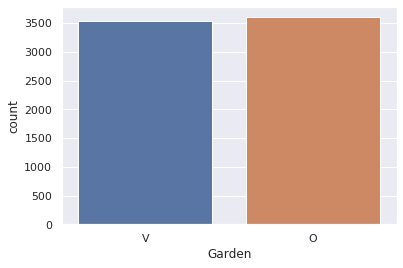

In [2007]:
sns.countplot(train['Garden'])

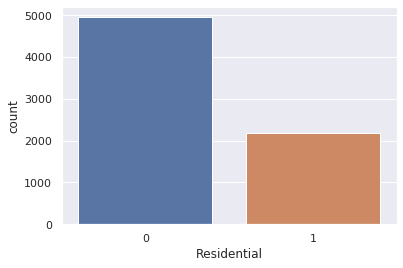

In [2008]:
sns.countplot(train['Residential'])

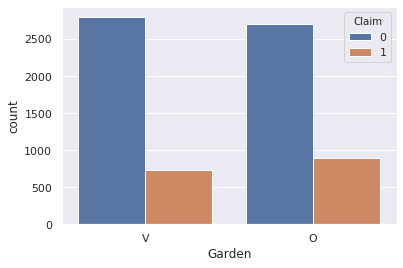

In [2009]:
sns.countplot(x='Garden', hue='Claim', data=train)

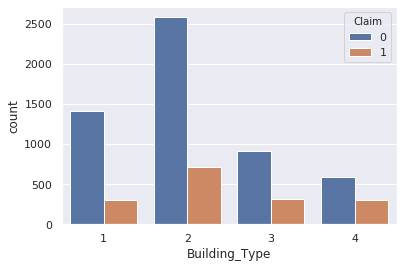

In [2010]:
sns.countplot(x='Building_Type', hue='Claim', data=train)

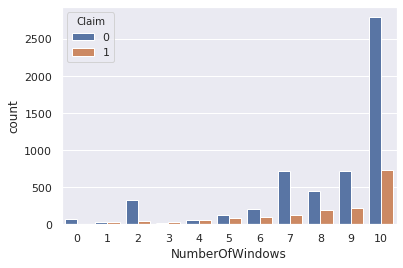

In [2011]:
sns.countplot(x='NumberOfWindows', hue='Claim', data=train)

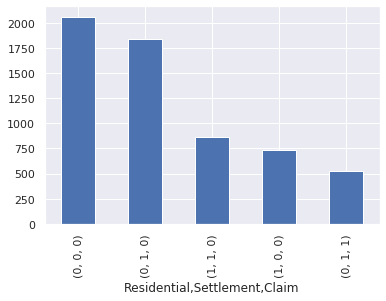

In [2012]:
train.groupby(['Residential', 'Settlement'])['Claim'].value_counts().sort_values(ascending=False).head().plot(kind='bar')

In [0]:
# Data preprocessing

In [2014]:
train.isnull().sum() / len(train)*100

Customer Id           0.000000
YearOfObservation     0.000000
Insured_Period        0.000000
Residential           0.000000
Building_Painted      0.000000
Building_Fenced       0.000000
Garden                0.098080
Settlement            0.000000
Building Dimension    1.485218
Building_Type         0.000000
Date_of_Occupancy     7.047779
NumberOfWindows       0.000000
Geo_Code              1.429172
Claim                 0.000000
duration              0.000000
dtype: float64

In [0]:
train['Date_of_Occupancy'] = train['Date_of_Occupancy'].fillna(train['Date_of_Occupancy'].mode()[0])
test['Date_of_Occupancy'] = test['Date_of_Occupancy'].fillna(test['Date_of_Occupancy'].mode()[0])

In [0]:
train['Building_Age']= train['YearOfObservation'] - train['Date_of_Occupancy']
test['Building_Age']= test['YearOfObservation'] - test['Date_of_Occupancy']

In [2017]:
train['Building_Age'].mean()

49.57587221521648

In [0]:
train['Building Dimension'] = train['Building Dimension'].fillna(train['Building Dimension'].mean())
test['Building Dimension'] = test['Building Dimension'].fillna(test['Building Dimension'].mean())

In [2019]:
train.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension      0
Building_Type           0
Date_of_Occupancy       0
NumberOfWindows         0
Geo_Code              102
Claim                   0
duration                0
Building_Age            0
dtype: int64

In [2020]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,duration,Building_Age
0,H14663,2013,1.0,0,1,0,V,0,290.0,1,1960.0,10,5.0,0,a year,53.0
1,H2037,2015,1.0,0,0,1,O,1,490.0,1,1850.0,9,5.0,0,a year,165.0
2,H3802,2014,1.0,0,1,0,V,0,595.0,1,1960.0,10,5.0,0,a year,54.0
3,H3834,2013,1.0,0,0,0,V,0,2840.0,1,1960.0,10,5.0,0,a year,53.0
4,H5053,2014,1.0,0,0,1,O,1,680.0,1,1800.0,7,5.0,0,a year,214.0


In [0]:
train =pd.get_dummies(train, columns =['duration'])

In [0]:
test =pd.get_dummies(test, columns =['duration'])

In [2023]:
train.dtypes

Customer Id              object
YearOfObservation         int64
Insured_Period          float64
Residential               int64
Building_Painted          int64
Building_Fenced           int64
Garden                   object
Settlement                int64
Building Dimension      float64
Building_Type             int64
Date_of_Occupancy       float64
NumberOfWindows           int64
Geo_Code                float64
Claim                     int64
Building_Age            float64
duration_1st quarter      uint8
duration_3rd quarter      uint8
duration_a year           uint8
duration_half_year        uint8
dtype: object

In [2024]:
train.isnull().sum()

Customer Id               0
YearOfObservation         0
Insured_Period            0
Residential               0
Building_Painted          0
Building_Fenced           0
Garden                    7
Settlement                0
Building Dimension        0
Building_Type             0
Date_of_Occupancy         0
NumberOfWindows           0
Geo_Code                102
Claim                     0
Building_Age              0
duration_1st quarter      0
duration_3rd quarter      0
duration_a year           0
duration_half_year        0
dtype: int64

In [0]:
train['Geo_Code'] =  train['Geo_Code'].fillna(train['Geo_Code'].mode()[0])
test['Geo_Code'] =  test['Geo_Code'].fillna(test['Geo_Code'].mode()[0])

In [0]:
train = train.drop(['Customer Id'], axis=1)
test = test.drop(['Customer Id'], axis=1)

In [2027]:
print(test.shape, train.shape)

(3069, 17) (7137, 18)


In [0]:
plt.rcParams['figure.figsize'] = [15,8]

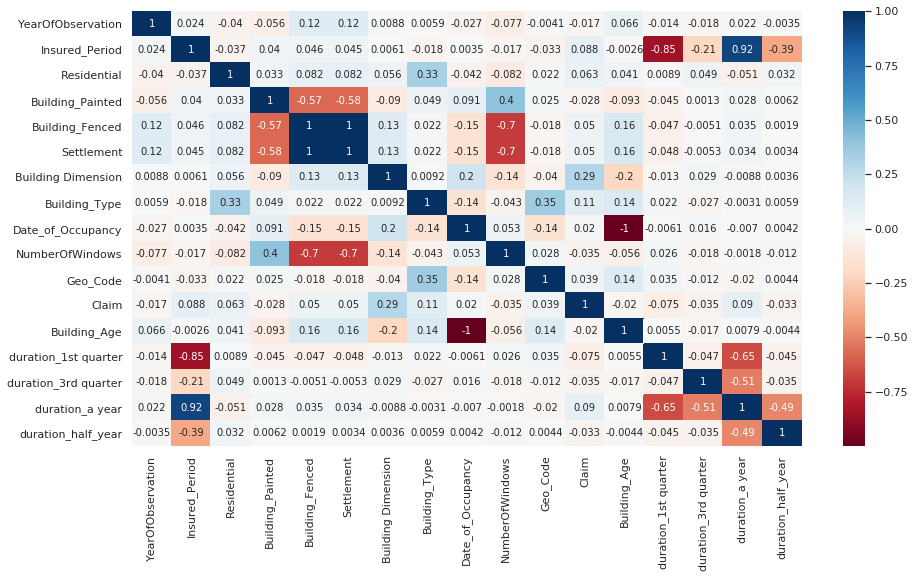

In [2029]:
sns.heatmap(train.corr(), annot=True, cmap='RdBu')

In [2030]:
test.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Building_Age', 'duration_1st quarter',
       'duration_3rd quarter', 'duration_a year', 'duration_half_year'],
      dtype='object')

In [2031]:
test['NumberOfWindows'].dtypes

dtype('int64')

In [2032]:
train.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim', 'Building_Age',
       'duration_1st quarter', 'duration_3rd quarter', 'duration_a year',
       'duration_half_year'],
      dtype='object')

In [0]:
train = train.drop(['Insured_Period','Garden','YearOfObservation','Building_Fenced'], axis=1)
test = test.drop(['Insured_Period','Garden','YearOfObservation','Building_Fenced'], axis=1)

In [2034]:
train.dtypes

Residential               int64
Building_Painted          int64
Settlement                int64
Building Dimension      float64
Building_Type             int64
Date_of_Occupancy       float64
NumberOfWindows           int64
Geo_Code                float64
Claim                     int64
Building_Age            float64
duration_1st quarter      uint8
duration_3rd quarter      uint8
duration_a year           uint8
duration_half_year        uint8
dtype: object

In [0]:
X = train.drop('Claim', axis=1)
y = train['Claim']

In [0]:
from sklearn.model_selection import train_test_split

In [2037]:
X.shape

(7137, 13)

In [2038]:
test.shape

(3069, 13)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=101)

In [2040]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6066, 13)
(1071, 13)
(6066,)
(1071,)


In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
model = RandomForestClassifier(n_estimators = 500, max_depth=5, random_state=42)

In [2064]:
cross_val_score(model, X_train, y_train, cv =3 )

array([0.78140455, 0.77546983, 0.77942631])

In [2046]:
0.78041543-0.77645895

0.00395648000000004

In [2047]:
0.78140455-0.77744807

0.003956479999999929

In [0]:
model=model.fit(X_train,y_train)

In [0]:
pred = model.predict_proba(test)[:, 1]

In [2050]:
test.columns

Index(['Residential', 'Building_Painted', 'Settlement', 'Building Dimension',
       'Building_Type', 'Date_of_Occupancy', 'NumberOfWindows', 'Geo_Code',
       'Building_Age', 'duration_1st quarter', 'duration_3rd quarter',
       'duration_a year', 'duration_half_year'],
      dtype='object')

In [2051]:
X.columns

Index(['Residential', 'Building_Painted', 'Settlement', 'Building Dimension',
       'Building_Type', 'Date_of_Occupancy', 'NumberOfWindows', 'Geo_Code',
       'Building_Age', 'duration_1st quarter', 'duration_3rd quarter',
       'duration_a year', 'duration_half_year'],
      dtype='object')

In [2052]:
test.isnull().sum()

Residential             0
Building_Painted        0
Settlement              0
Building Dimension      0
Building_Type           0
Date_of_Occupancy       0
NumberOfWindows         0
Geo_Code                0
Building_Age            0
duration_1st quarter    0
duration_3rd quarter    0
duration_a year         0
duration_half_year      0
dtype: int64

In [2053]:
pred

array([0.14266208, 0.14150799, 0.10612558, ..., 0.19346653, 0.19575788,
       0.18397893])

In [2054]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print('train Score: ', clf.score(X_train,y_train))
print('Validate Data Score: ', clf.score(X_test,y_test))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

train Score:  0.9981866139136168
Validate Data Score:  0.7021475256769374


In [2055]:
prediction = clf.predict_proba(test)[:, 1]
prediction.shape, test.shape

((3069,), (3069, 13))

In [0]:
x=pd.DataFrame({'Claim': pred})

In [0]:
y=pd.DataFrame({'Customer Id':testid})

In [2058]:
submission = pd.concat([y,x], axis ='columns')
submission.head()

,Customer Id,Claim
0,H11920,0.142662
1,H11921,0.141508
2,H9805,0.106126
3,H7493,0.172902
4,H7494,0.173084


In [0]:
submission.to_csv('violette16.csv', index=False)